In [25]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.svm import SVC  # For Support Vector Classifier
from sklearn.svm import LinearSVC  # For Linear Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [26]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
directory = r"D:\data_mining\cropped"

In [28]:
from skimage import filters
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)
hist=[]
label=[]
for index,name in enumerate(os.listdir(directory)):
    for image in os.listdir(os.path.join(directory,name)):
        img = imread(os.path.join(directory,name,image.strip()))
        gray_img = rgb2gray(img)
        angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
        Hist,_=exposure.histogram(angle_sobel, nbins=36)
        hist.append(Hist)
        label.append(index)

In [29]:
X = np.array(hist)
Y = np.array(label)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=42)


In [31]:
scaler = preprocessing.StandardScaler().fit(X_train)


In [32]:
X_scaled = scaler.transform(X_train)


In [33]:
X_scaled.mean(axis=0)


array([-3.53574212e-18, -9.13105402e-17,  1.15795554e-16, -1.63925844e-16,
       -3.76556535e-16,  8.87471271e-17,  4.09262150e-17,  3.80976213e-16,
       -5.65188377e-16,  3.28779820e-16,  3.49331321e-16,  1.48324382e-16,
       -3.54988509e-16,  2.59877046e-16, -2.04012320e-16,  1.09961580e-16,
       -1.52744059e-16,  1.14204470e-16, -2.38309019e-16,  4.22521183e-17,
        2.72252143e-16,  1.06602625e-16, -3.64181438e-17,  2.85643766e-16,
       -4.05240243e-16, -1.04481180e-16, -3.58259070e-16,  2.11437379e-16,
       -1.88720235e-16,  3.63474290e-16, -3.45353611e-16,  5.09146865e-17,
        1.23397400e-16,  1.29054587e-16,  1.17033064e-16, -6.14335193e-17])

In [34]:
X_scaled.std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [35]:
X_test_scaled = scaler.transform(X_test)


In [36]:
train_errors=[]
val_errors=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_val=[1,3,5,7,10,20]
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in kf.split(X_scaled):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    train_errors.append(np.mean(train))
    val_errors.append(np.mean(val))

In [37]:
stratified_train_e=[]
stratified_val_e=[]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in skf.split(X_scaled,y_train):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    stratified_train_e.append(np.mean(train))
    stratified_val_e.append(np.mean(val))

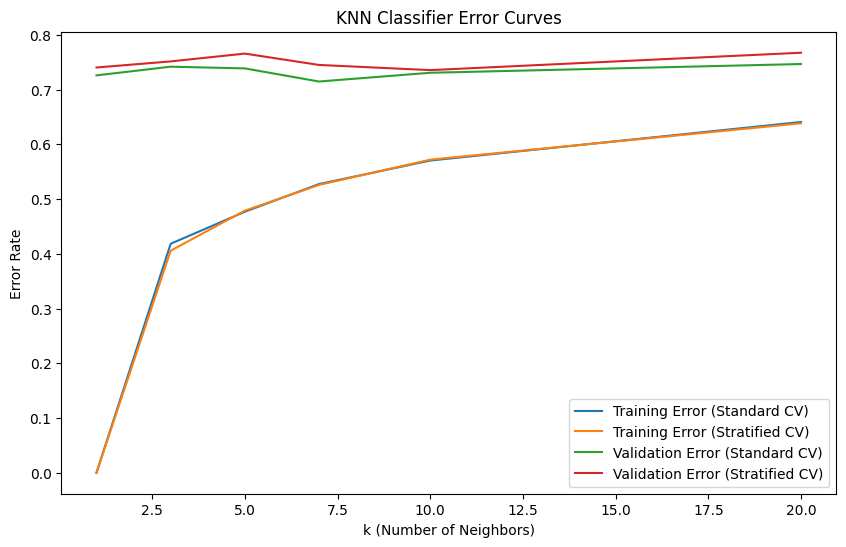

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_val, train_errors, label='Training Error (Standard CV)')
plt.plot(k_val, stratified_train_e, label='Training Error (Stratified CV)')
plt.plot(k_val, val_errors, label='Validation Error (Standard CV)')
plt.plot(k_val, stratified_val_e, label='Validation Error (Stratified CV)')

plt.title('KNN Classifier Error Curves')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()

plt.show()

In [39]:
# k=3
Model = KNeighborsClassifier(n_neighbors = 3)
Model.fit(X_scaled, y_train)
p = Model.predict(X_test_scaled)
print("Test error when k=3 :" + str(1-(accuracy_score(y_test,p))))

Test error when k=3 :0.6835443037974683


DecisionTreeClassifier()


              precision    recall  f1-score   support

           0       0.16      0.17      0.16        42
           1       0.24      0.23      0.24        35
           2       0.27      0.27      0.27        41
           3       0.28      0.28      0.28        40

    accuracy                           0.23       158
   macro avg       0.24      0.23      0.24       158
weighted avg       0.24      0.23      0.23       158

Mean validation acc: 0.2709505764734338


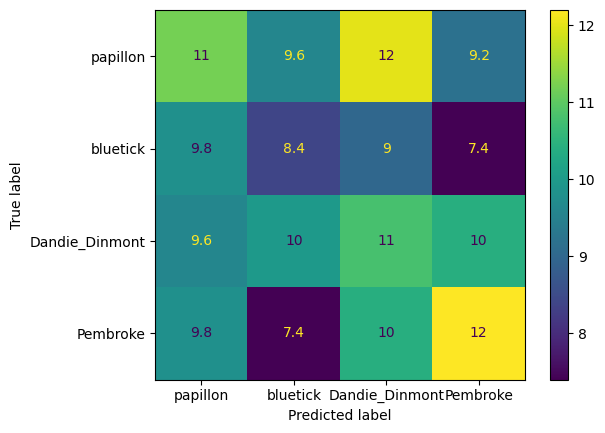

MLPClassifier(hidden_layer_sizes=(10, 10, 10))




C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.36      0.33        42
           1       0.20      0.23      0.21        35
           2       0.41      0.34      0.37        41
           3       0.39      0.35      0.37        40

    accuracy                           0.32       158
   macro avg       0.33      0.32      0.32       158
weighted avg       0.33      0.32      0.33       158



C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean validation acc: 0.2812061598000483


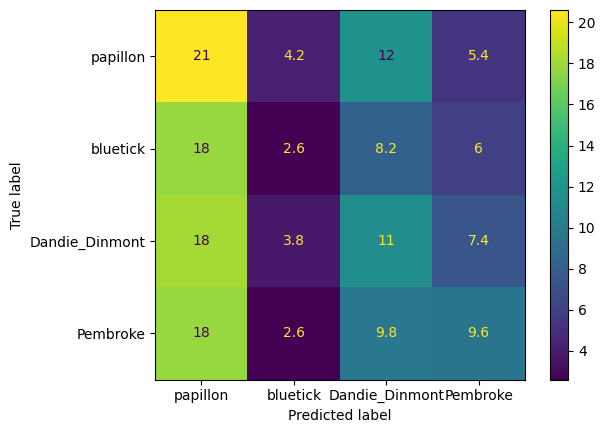

AdaBoostClassifier()




C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.36      0.29        42
           1       0.23      0.17      0.20        35
           2       0.23      0.24      0.24        41
           3       0.32      0.23      0.26        40

    accuracy                           0.25       158
   macro avg       0.26      0.25      0.25       158
weighted avg       0.26      0.25      0.25       158



C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Mean validation acc: 0.27602193017818266


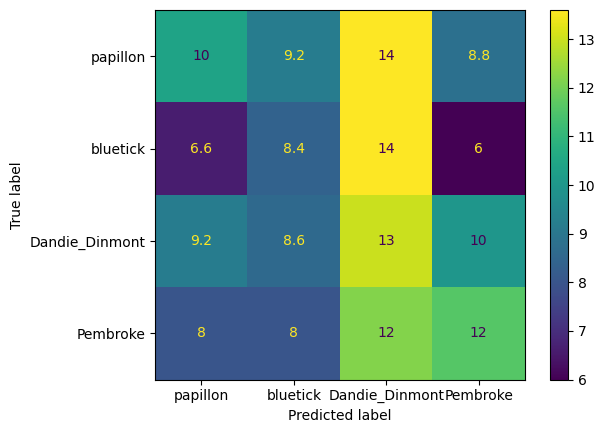

In [40]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
dt_model=DecisionTreeClassifier()
neural_network=MLPClassifier(hidden_layer_sizes=(10,10,10))
Ada_boost= AdaBoostClassifier()
for clf in [dt_model,neural_network,Ada_boost]:
    print(str(clf)+"\n\n")
    clf.fit(X_scaled,y_train)
    predictions=clf.predict(X_test_scaled)
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    report=metrics.classification_report(y_test,predictions)
    print(report)
    truelabels,predictlabels,cm,val_a=[],[],[],[]
    for traini,testi in skf.split(X,Y):
        xtrain,xtest=X[traini],X[testi]
        ytrain,ytest=Y[traini],Y[testi]
        
        clf.fit(xtrain,ytrain)
        p=clf.predict(xtest)
        
        truelabels.extend(ytest)
        predictlabels.extend(p)
        val_a.append(metrics.accuracy_score(ytest,p))        
        cm.append(metrics.confusion_matrix(ytest,p))
    print("Mean validation acc: "+str(np.mean(val_a)))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = sum(cm)/len(cm), display_labels = ['papillon', 'bluetick', 'Dandie_Dinmont','Pembroke'] )
    cm_display.plot()
    plt.show()

In [41]:
By visually comparing the three confusion matrices (on the test set), which do you think is the best method? Why?
MLP shows better intensity along the diagonal in the confusion matrix, indicating a higher correct classification rate for each class.

SyntaxError: invalid syntax (1903853503.py, line 2)

In [ ]:
Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods, which is the best method?
Decision Tree achieved the highest mean validation accuracy, approximately 28.5% across the 5-fold cross-validation.

In [ ]:
Compute the accuracies for the three methods on the test set. Which is the best method?
Best Method by Test Accuracy: MLP achieved the highest test accuracy of 32%, making it the best performer on the test set.

In [ ]:
Compute the F-measure for the three methods on the test set. Which is the best method?
MLP has the highest F-measure on the test set, approximately 0.36, indicating it maintains a better balance between precision and recall for this classification task.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class_1, class_2 = 0, 1

# Filter out samples that belong to the two selected classes
mask = (y_train == class_1) | (y_train == class_2)
X_train_two_classes = X_train[mask]
y_train_two_classes = y_train[mask]

# Similarly filter the test set if needed
mask_test = (y_test == class_1) | (y_test == class_2)
X_test_two_classes = X_test[mask_test]
y_test_two_classes = y_test[mask_test]


C_values = [0.1, 1, 10, 100]
standard_kf = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store errors
standard_train_errors = []
standard_val_errors = []
stratified_train_errors = []
stratified_val_errors = []

# Loop over each C value for both standard and stratified CV
for C in C_values:
    svc = LinearSVC(C=C, random_state=42, max_iter=10000)

    # Standard 5-fold CV
    train_errors_standard = []
    val_errors_standard = []
    for train_index, val_index in standard_kf.split(X_train_two_classes):
        X_train_fold, X_val_fold = X_train_two_classes[train_index], X_train_two_classes[val_index]
        y_train_fold, y_val_fold = y_train_two_classes[train_index], y_train_two_classes[val_index]

        svc.fit(X_train_fold, y_train_fold)
        train_pred = svc.predict(X_train_fold)
        val_pred = svc.predict(X_val_fold)

        train_errors_standard.append(1 - accuracy_score(y_train_fold, train_pred))
        val_errors_standard.append(1 - accuracy_score(y_val_fold, val_pred))

    standard_train_errors.append(np.mean(train_errors_standard) * 100)
    standard_val_errors.append(np.mean(val_errors_standard) * 100)

    # Stratified 5-fold CV
    train_errors_stratified = []
    val_errors_stratified = []
    for train_index, val_index in stratified_kf.split(X_train_two_classes, y_train_two_classes):
        X_train_fold, X_val_fold = X_train_two_classes[train_index], X_train_two_classes[val_index]
        y_train_fold, y_val_fold = y_train_two_classes[train_index], y_train_two_classes[val_index]

        svc.fit(X_train_fold, y_train_fold)
        train_pred = svc.predict(X_train_fold)
        val_pred = svc.predict(X_val_fold)

        train_errors_stratified.append(1 - accuracy_score(y_train_fold, train_pred))
        val_errors_stratified.append(1 - accuracy_score(y_val_fold, val_pred))

    stratified_train_errors.append(np.mean(train_errors_stratified) * 100)
    stratified_val_errors.append(np.mean(val_errors_stratified) * 100)

# Plot the error curves
plt.figure(figsize=(10, 6))
plt.plot(C_values, standard_train_errors, label='Standard CV - Training Error', marker='o')
plt.plot(C_values, standard_val_errors, label='Standard CV - Validation Error', marker='o')
plt.plot(C_values, stratified_train_errors, label='Stratified CV - Training Error', marker='o')
plt.plot(C_values, stratified_val_errors, label='Stratified CV - Validation Error', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Error (%)')
plt.title('Training and Validation Errors for Different C Values')
plt.legend()
plt.show()


In [ ]:
Which C has/have the lowest mean error for each curve?
all the four curves have similar mean errors across different values of C (0.1, 1, 10, 100).
Comments on Model Complexity in relation to C?
In SVM, C controls the strength of regularization. When C values are low, the model tends to be overly regularized and may end up in underfitting. When the C values are high, the model would fit training data closely but may tend to overfit.

There seems to be neither overfitting nor underfitting, as the train and cross-validation errors dont change appreciably for the whole range of C.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

best_C = 1
best_svc = LinearSVC(C=best_C, random_state=42, max_iter=10000)

best_svc.fit(X_train_two_classes, y_train_two_classes)

test_predictions = best_svc.predict(X_test_two_classes)

test_error = 1 - accuracy_score(y_test_two_classes, test_predictions)
print(f"Test Error with best C ({best_C}): {test_error * 100:.2f}%")
